In [1]:
# Import essential libraries for data science and machine learning
import numpy as np  # Numerical computing and array operations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Data visualization and plotting
import seaborn as sns  # Advanced statistical data visualization
import warnings  # Warning messages control

# Suppress warning messages for cleaner output
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

Data Loading

In [2]:
#loading Data
df = pd.read_csv('House_Rent_Dataset.csv',index_col='Posted On')

In [3]:
# Display the first few rows
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
5/18/2022,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
5/13/2022,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
5/16/2022,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
7/4/2022,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
5/9/2022,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [4]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 5/18/2022 to 5/4/2022
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4741 non-null   float64
 2   Size               4738 non-null   float64
 3   Floor              4746 non-null   object 
 4   Area Type          4739 non-null   object 
 5   Area Locality      4746 non-null   object 
 6   City               4746 non-null   object 
 7   Furnishing Status  4746 non-null   object 
 8   Tenant Preferred   4746 non-null   object 
 9   Bathroom           4742 non-null   float64
 10  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 444.9+ KB


In [5]:
# Check the dimensions of the data frame (rows and columns)
df.shape

(4746, 11)

In [6]:
df.shape

(4746, 11)

In [7]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(8)

Size             8
Area Type        7
Rent             5
Bathroom         4
BHK              0
Floor            0
Area Locality    0
City             0
dtype: int64

Data Cleaning and Preprocessing

In [8]:
# Dropping non-relevant columns (ID, date, and time) to clean the dataset for modeling
df = df.dropna(subset=['Rent','Area Type','Size','Bathroom'])

In [9]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(8)

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
dtype: int64

In [10]:
# Selecting numerical columns from DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# numerical columns Display
numeric_cols

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

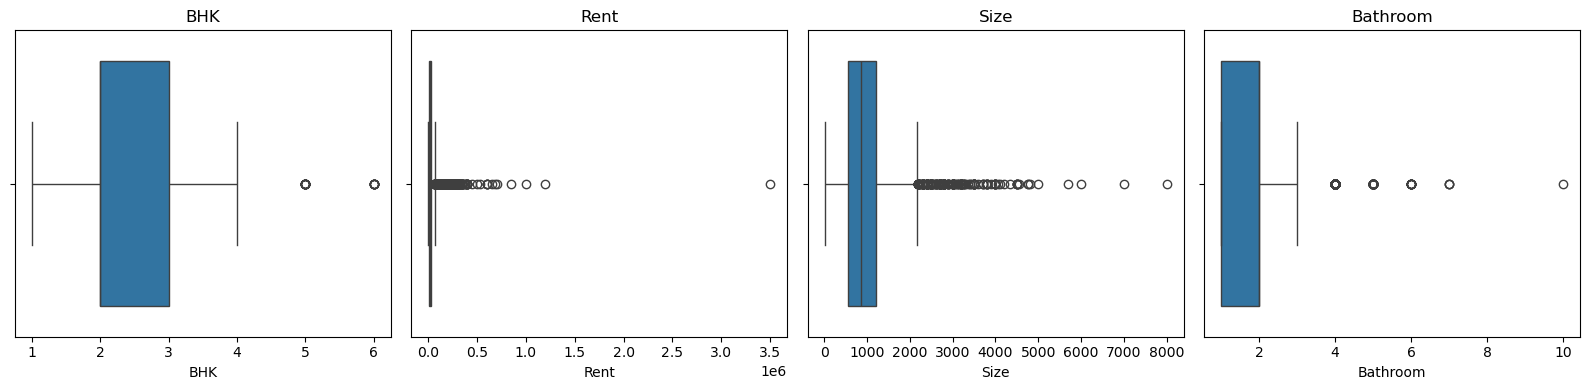

In [11]:
import math

# Calculate grid dimensions for subplots
num_cols = len(numeric_cols)  # Get total number of numeric columns
cols_per_row = 4  # Set number of boxplots per row
rows = math.ceil(num_cols / cols_per_row)  # Calculate required rows (round up)

# Create figure with dynamic size based on grid dimensions
plt.figure(figsize=(4*cols_per_row, 4*rows))

# Loop through each numeric column and create boxplot
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i+1)  # Create subplot at position i+1
    sns.boxplot(x=df[col])  # Create boxplot for current column
    plt.title(f"{col}")  # Set title as column name
    plt.tight_layout()  # Adjust spacing between subplots

# Display the complete grid of boxplots
plt.show()

In [12]:
# Dictionary to store outlier counts for each column
outlier_counts = {}

# Loop through each numeric column to detect outliers
for col in numeric_cols:
    # Calculate quartiles and IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Calculate lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR  # Lower bound
    upper = Q3 + 1.5 * IQR  # Upper bound
    
    # Count outliers (values outside the lower and upper bounds)
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = count

# Print the outlier counts for all numeric columns
print(outlier_counts)

{'BHK': 27, 'Rent': 520, 'Size': 203, 'Bathroom': 232}


In [13]:

# List of columns to treat for outliers
cols_to_fix = ['Size', 'Bathroom','BHK']

for col in cols_to_fix:
    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Calculate lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR  # Lower bound
    upper = Q3 + 1.5 * IQR  # Upper bound
    
    # Cap outliers at the bounds (Winsorization)
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

In [14]:
# Dictionary to store outlier counts for each column
outlier_counts = {}

# Loop through each numeric column to detect outliers
for col in numeric_cols:
    # Calculate quartiles and IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Calculate lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR  # Lower bound
    upper = Q3 + 1.5 * IQR  # Upper bound
    
    # Count outliers (values outside the lower and upper bounds)
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = count

# Print the outlier counts for all numeric columns
print(outlier_counts)

{'BHK': 0, 'Rent': 520, 'Size': 0, 'Bathroom': 0}


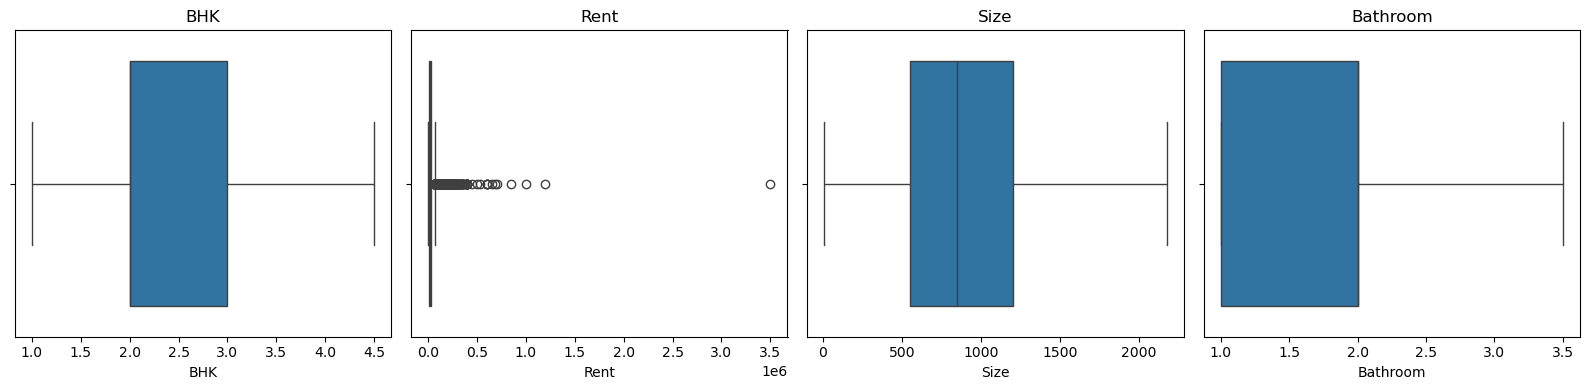

In [15]:


# Calculate grid dimensions for subplots
num_cols = len(numeric_cols)  # Get total number of numeric columns
cols_per_row = 4  # Set number of boxplots per row
rows = math.ceil(num_cols / cols_per_row)  # Calculate required rows (round up)

# Create figure with dynamic size based on grid dimensions
plt.figure(figsize=(4*cols_per_row, 4*rows))

# Loop through each numeric column and create boxplot
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i+1)  # Create subplot at position i+1
    sns.boxplot(x=df[col])  # Create boxplot for current column
    plt.title(f"{col}")  # Set title as column name
    plt.tight_layout()  # Adjust spacing between subplots

# Display the complete grid of boxplots
plt.show()

In [16]:
# Select and display columns with object data type (typically strings/categorical)
df.select_dtypes(include='object').columns

Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object')

In [17]:
# Apply One-Hot Encoding to multiple categorical columns
df = pd.get_dummies(df, columns=['City', 'Area Type', 'Furnishing Status', 
                                 'Tenant Preferred', 'Point of Contact'], drop_first=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to specific categorical columns
for col in ['Floor','Area Locality']:
    df[col] = le.fit_transform(df[col])


In [19]:
# Calculate correlation matrix and extract correlations with 'Rent'
corr = df.corr()['Rent'].sort_values(ascending=False)
# Identify features with weak correlation (absolute value less than 0.05)
weak_features = corr[abs(corr) < 0.05].index.tolist()

# Display the list of weak features
weak_features

['Furnishing Status_Semi-Furnished',
 'Floor',
 'Point of Contact_Contact Builder',
 'Area Locality',
 'City_Delhi']

In [20]:
# Selecting numerical columns from DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# numerical columns Display
numeric_cols

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

In [21]:
# Remove weak features (columns) from the dataframe
df.drop(columns=weak_features, inplace=True)


Rent                                 1.000000
Bathroom                             0.388312
BHK                                  0.367507
Size                                 0.358027
City_Mumbai                          0.326716
Area Type_Carpet Area                0.216771
Tenant Preferred_Family              0.063601
Tenant Preferred_Bachelors/Family   -0.078898
City_Chennai                        -0.082947
City_Hyderabad                      -0.088044
City_Kolkata                        -0.103999
Furnishing Status_Unfurnished       -0.126061
Area Type_Super Area                -0.216499
Point of Contact_Contact Owner      -0.339932
Name: Rent, dtype: float64


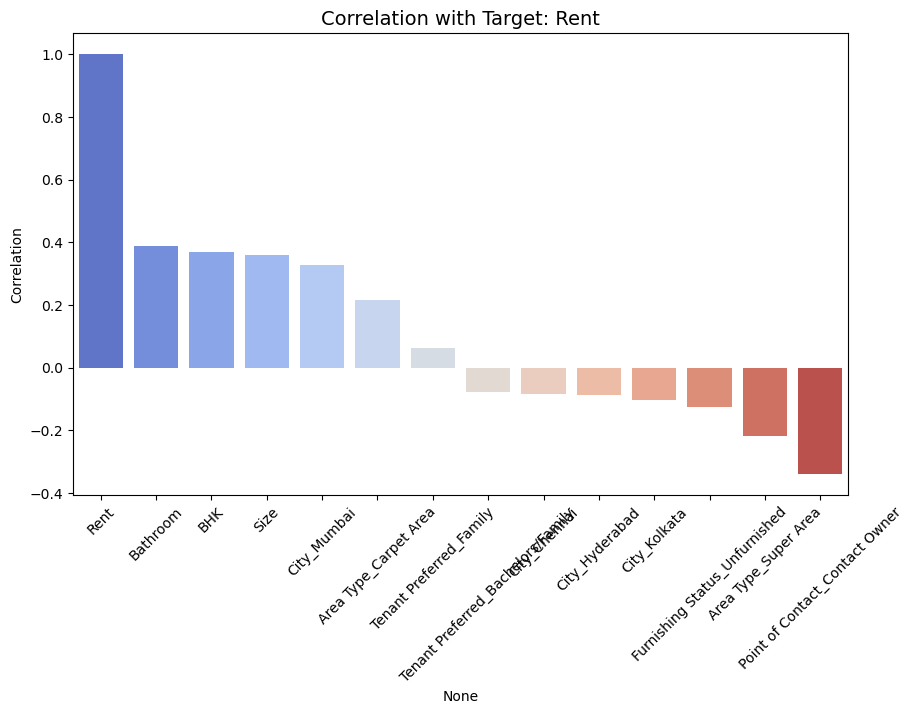

In [22]:
# 🔹 Achievement Comment:
corr = df.corr()

# Correlation of columns with the 'Rent' column
corr_target = corr['Rent'].sort_values(ascending=False)  # تصاعديًا أو تنازليًا حسب الرغبة

# Show results
print(corr_target)

# Correction bar drawing
plt.figure(figsize=(10,6))
sns.barplot(x=corr_target.index, y=corr_target.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlation with Target: Rent", fontsize=14)
plt.ylabel("Correlation")
plt.show()

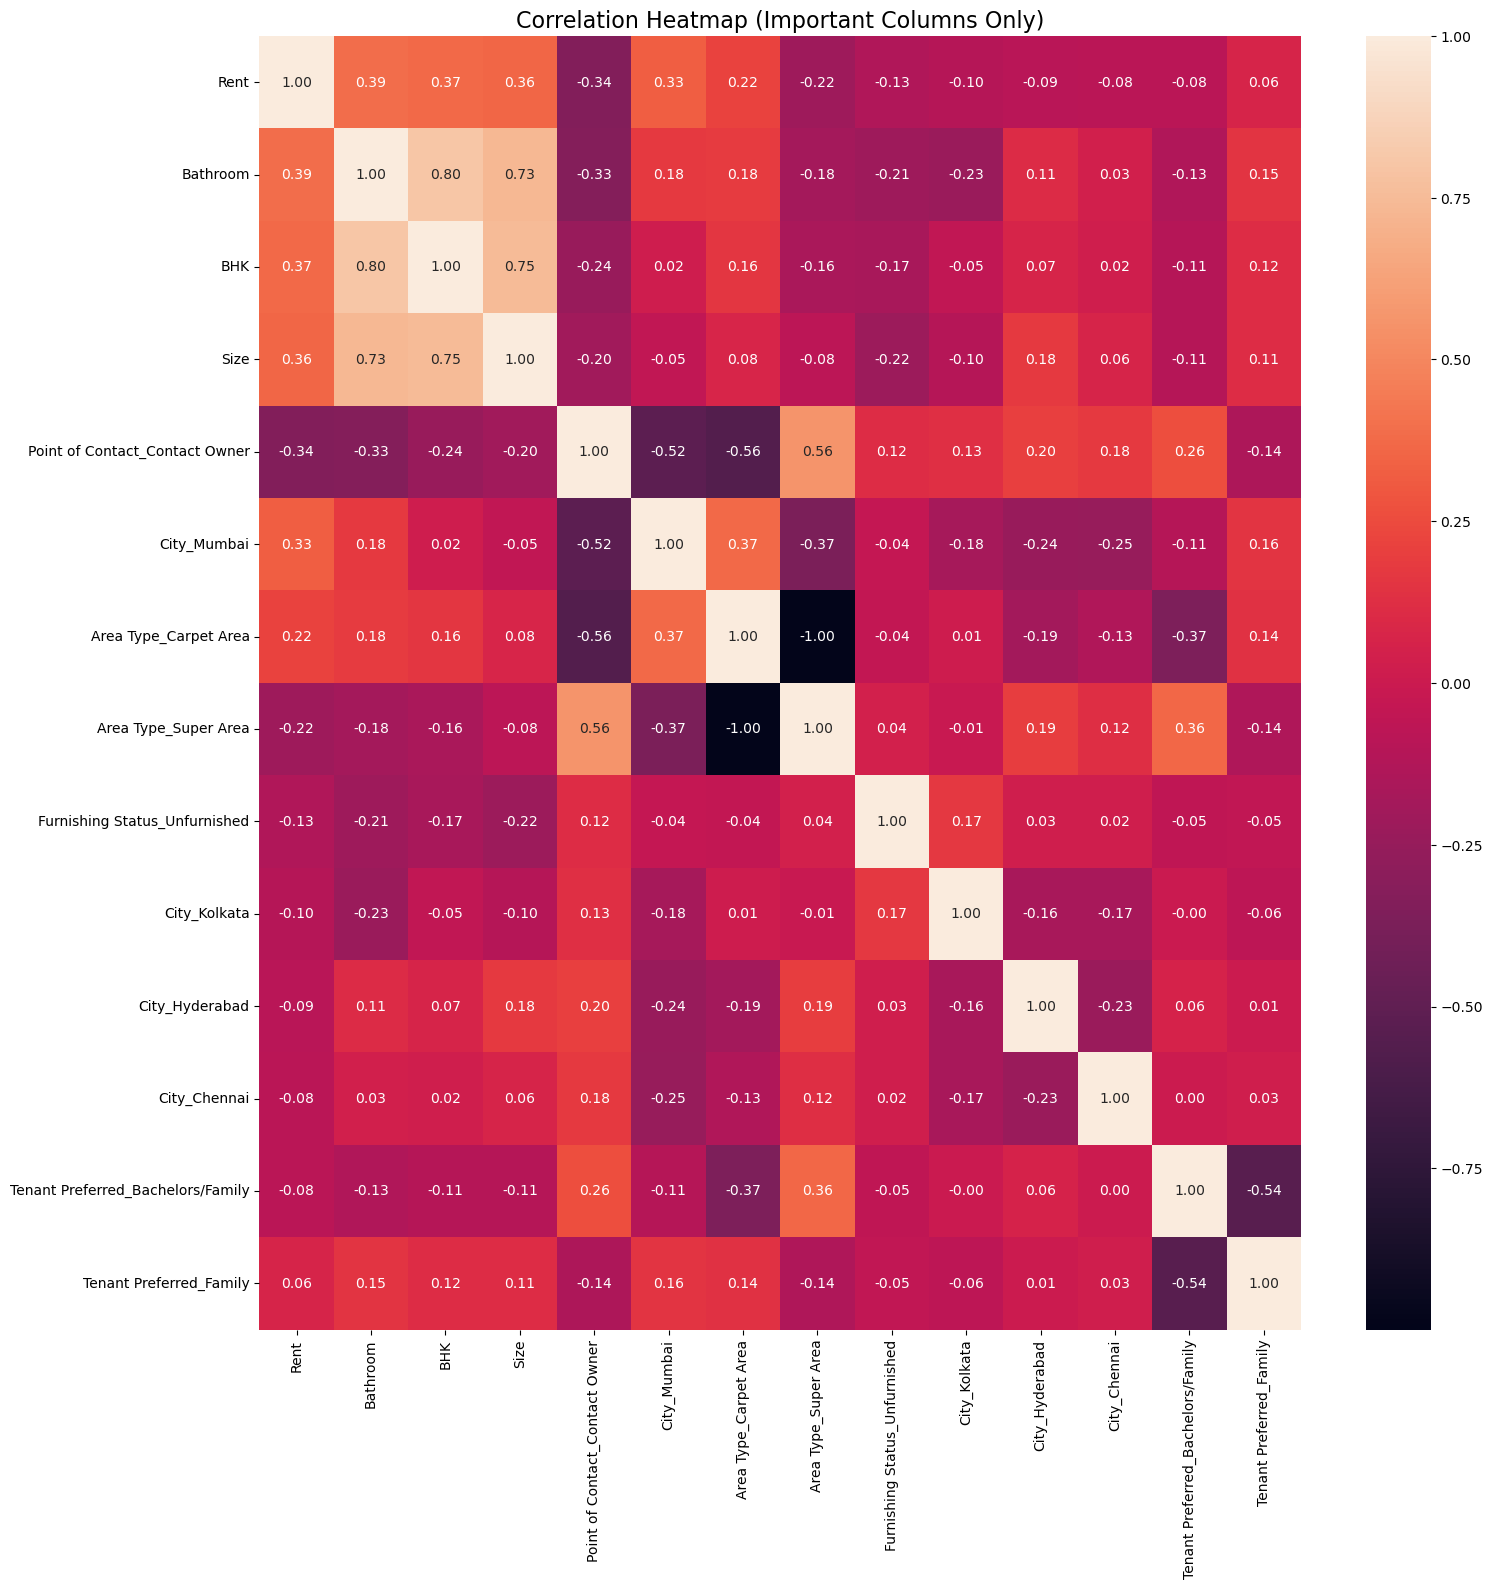

In [23]:

# Calculate correlation matrix for numeric columns only
corr_matrix = df.corr(numeric_only=True)

# Filter columns with correlation to target > 0.05 (absolute value)
target_corr = corr_matrix['Rent'].abs().sort_values(ascending=False)
important_cols = target_corr[target_corr > 0.05].index.tolist()

# Filter correlation matrix to include only important columns
filtered_corr = corr_matrix.loc[important_cols, important_cols]

# Create heatmap with dynamic size based on number of important columns
plt.figure(figsize=(len(important_cols)*1.2, len(important_cols)*1.2))

# Plot correlation heatmap with annotations
sns.heatmap(filtered_corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap (Important Columns Only)', fontsize=16)
plt.show()

In [24]:
# Splitting data to input features and output target
X = df.drop('Rent', axis=1)  # Input features (all columns except target)
y = df['Rent']  # Output label (target variable)

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (3780, 13)
Testing data: (946, 13)


In [25]:
# Select all column names except 'Accident_Severity'
num_cols = df.columns.drop('Rent')

In [26]:
from sklearn.preprocessing import MinMaxScaler
import pickle

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns only
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMax scaling to training and test data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Save the fitted scaler to a pickle file for future use
with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [27]:
# Count the frequency of each unique value in the 'Accident_Severity' column
df['Rent'].value_counts()

Rent
15000.0      274
10000.0      246
12000.0      238
20000.0      174
8000.0       162
            ... 
9400.0         1
500000.0       1
1200000.0      1
51500.0        1
5800.0         1
Name: count, Length: 243, dtype: int64

In [28]:
# Import Machine Learning Regression Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge  # Linear models
from sklearn.neighbors import KNeighborsRegressor  # Instance-based learning
from sklearn.svm import SVR  # Support Vector Machines for regression
from sklearn.tree import DecisionTreeRegressor  # Decision tree for regression

# Ensemble Methods for Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Enable experimental Histogram Gradient Boosting
from sklearn.experimental import enable_hist_gradient_boosting  # Needed for HistGB
from sklearn.ensemble import HistGradientBoostingRegressor

# Advanced Gradient Boosting Libraries for Regression
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [29]:
# Dictionary of regression models with their configurations
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1), # minkowski, euclidean, manhattan
    "SVM": SVR(kernel='linear', C=100, gamma=1), # kernel='rbf' / kernel='poly', degree=4 / kernel='sigmoid
    "Decision Tree": DecisionTreeRegressor(criterion='squared_error', max_depth=10), # {"squared_error", "friedman_mse", "absolute_error", "poisson"}
    "Random Forest": RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=10), # {"squared_error", "friedman_mse", "absolute_error", "poisson"}
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Bagging": BaggingRegressor(estimator=DecisionTreeRegressor(criterion='squared_error', max_depth=10), n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(verbose=0, iterations=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [30]:
# Importing essential regression metrics:
# - MAE  (Mean Absolute Error): Measures average absolute prediction error.
# - MSE  (Mean Squared Error): Penalizes larger errors more heavily.
# - RMSE (Root Mean Squared Error): Provides error in the same units as the target.
# - R²   (R-squared): Indicates how much variance in the target is explained by the model.
# These metrics together provide a comprehensive evaluation of regression model performance.

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [31]:
# Initialize list to store evaluation metrics for all models
errors = []

# Loop through each model in the dictionary
for model_name, model in models.items():
    # Train the model on training data
    model.fit(X_train, y_train)
    
    # Calculate metrics on training data
    MAE_Train = mean_absolute_error(y_train, model.predict(X_train))
    MSE_Train = mean_squared_error(y_train, model.predict(X_train))
    RMSE_Train = np.sqrt(MSE_Train)  # Calculate RMSE from MSE
    R_Train = r2_score(y_train, model.predict(X_train))
    
    # Calculate metrics on test data
    MAE_Test = mean_absolute_error(y_test, model.predict(X_test))
    MSE_Test = mean_squared_error(y_test, model.predict(X_test))
    RMSE_Test = np.sqrt(MSE_Test)  # Calculate RMSE from MSE
    R_Test = r2_score(y_test, model.predict(X_test))
    
    # Append metrics to results list
    errors.append([MAE_Train, MSE_Train, RMSE_Train, R_Train, 
                   MAE_Test, MSE_Test, RMSE_Test, R_Test])
    
    # Print model performance for each model
    print(f"{model_name}:")
    print(f"  Train - MAE: {MAE_Train:.3f}, R²: {R_Train:.3f}")
    print(f"  Test  - MAE: {MAE_Test:.3f}, R²: {R_Test:.3f}")
    print("-" * 50)

Linear Regression:
  Train - MAE: 25073.116, R²: 0.267
  Test  - MAE: 23100.752, R²: 0.350
--------------------------------------------------
Lasso:
  Train - MAE: 25069.613, R²: 0.267
  Test  - MAE: 23096.717, R²: 0.350
--------------------------------------------------
Ridge:
  Train - MAE: 25030.486, R²: 0.267
  Test  - MAE: 23051.036, R²: 0.350
--------------------------------------------------
KNN:
  Train - MAE: 12798.427, R²: 0.477
  Test  - MAE: 14157.869, R²: 0.235
--------------------------------------------------
SVM:
  Train - MAE: 18298.065, R²: 0.127
  Test  - MAE: 14020.990, R²: 0.213
--------------------------------------------------
Decision Tree:
  Train - MAE: 9254.346, R²: 0.590
  Test  - MAE: 13768.035, R²: 0.254
--------------------------------------------------
Random Forest:
  Train - MAE: 10019.867, R²: 0.595
  Test  - MAE: 12602.444, R²: 0.356
--------------------------------------------------
ExtraTrees:
  Train - MAE: 5586.104, R²: 0.634
  Test  - MAE: 13673

In [32]:
# Create DataFrame from errors list with appropriate column names and model names as index
results_df = pd.DataFrame(errors,
                         columns=["MAE_Train", "MSE_Train", "RMSE_Train", "R_Train", 
                                 "MAE_Test", "MSE_Test", "RMSE_Test", "R_Test"],
                         index=models.keys())

# Display the results DataFrame
results_df

,MAE_Train,MSE_Train,RMSE_Train,R_Train,MAE_Test,MSE_Test,RMSE_Test,R_Test
Linear Regression,25073.116215,5.001526e+09,70721.469213,0.267415,23100.752484,2.136213e+09,46219.179492,0.349803
Lasso,25069.613419,5.001539e+09,70721.561661,0.267414,23096.717298,2.136091e+09,46217.869765,0.349839
Ridge,25030.486039,5.001575e+09,70721.810776,0.267408,23051.036156,2.134900e+09,46204.982470,0.350202
KNN,12798.426878,3.572619e+09,59771.390478,0.476711,14157.869345,2.514301e+09,50142.803593,0.234724
SVM,18298.064549,5.957923e+09,77187.582744,0.127330,14020.990173,2.584683e+09,50839.773683,0.213302
Decision Tree,9254.345735,2.801876e+09,52932.750726,0.589603,13768.034913,2.451883e+09,49516.489107,0.253722
Random Forest,10019.866657,2.766761e+09,52600.012091,0.594746,12602.443642,2.114612e+09,45984.905596,0.356377
ExtraTrees,5586.103779,2.495731e+09,49957.292613,0.634445,13673.273446,2.810140e+09,53010.757706,0.144680
Bagging,10198.930390,2.798578e+09,52901.592487,0.590086,12775.254938,2.135569e+09,46212.221110,0.349998
AdaBoost,17300.774388,5.527435e+09,74346.724578,0.190384,15232.636675,4.190185e+09,64731.635015,-0.275363


In [33]:
# Libraries
from sklearn.ensemble import StackingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# -----------------------------
# Base models for stacking
# -----------------------------
regressors = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=50, learning_rate=0.1, verbosity=0)),
    ('cat', CatBoostRegressor(iterations=50, learning_rate=0.1, verbose=0)),
    ('lgb', LGBMRegressor(n_estimators=50, learning_rate=0.1, random_state=42))
]

# -----------------------------
# Meta-model
# -----------------------------
meta_regressor = LinearRegression()

# -----------------------------
# Stacking Models
# -----------------------------
stacking_regressor = StackingRegressor(
    estimators=regressors,
    final_estimator=meta_regressor,
    cv=5,
    passthrough=True,
    n_jobs=-1
)


stacking_regressor.fit(X_train, y_train)
print("Regression Predictions:", stacking_regressor.score(X_test,y_test))

Regression Predictions: 0.6548604077861702
